# *Retail Transaction Insights and Trends (EDA)*

In [126]:
# NB:  This whole notebook was created in Kaggle

### **Importing Libraries**

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading Dataset**

In [68]:
path = '/kaggle/input/transactions/transactions.xlsx'
df = pd.read_excel(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38500 entries, 0 to 38499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     38500 non-null  int64  
 1   Date               38500 non-null  object 
 2   Customer_Name      38500 non-null  object 
 3   Total_Items        38500 non-null  int64  
 4   Amount($)          38500 non-null  float64
 5   Payment_Method     38500 non-null  object 
 6   City               38500 non-null  object 
 7   Store_Type         38500 non-null  object 
 8   Discount_Applied   38500 non-null  bool   
 9   Customer_Category  38500 non-null  object 
 10  Season             38500 non-null  object 
 11  Promotion          25529 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 3.3+ MB


In [69]:
df.head(3)

,Transaction_ID,Date,Customer_Name,Total_Items,Amount($),Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000667075,2022-09-12 17:40:23,David King,5,30.98,Debit Card,Chicago,Warehouse Club,True,Teenager,Fall,BOGO (Buy One Get One)
1,1000156022,2022-01-20 23:03:20,Michael Williamson,3,23.29,Credit Card,Boston,Warehouse Club,True,Homemaker,Winter,Discount on Selected Items
2,1000681674,2022-10-15 07:49:59,Chelsea Garza,7,25.62,Debit Card,Chicago,Pharmacy,False,Teenager,Fall,Discount on Selected Items


In [70]:
df.describe()

,Transaction_ID,Total_Items,Amount($)
count,3.850000e+04,38500.000000,38500.000000
mean,1.000500e+09,5.490649,52.459843
std,2.890708e+05,2.868476,27.442214
min,1.000000e+09,1.000000,5.000000
25%,1.000248e+09,3.000000,28.760000
50%,1.000501e+09,5.000000,52.260000
75%,1.000751e+09,8.000000,76.350000
max,1.001000e+09,10.000000,100.000000


In [71]:
df.columns

Index(['Transaction_ID', 'Date', 'Customer_Name', 'Total_Items', 'Amount($)',
       'Payment_Method', 'City', 'Store_Type', 'Discount_Applied',
       'Customer_Category', 'Season', 'Promotion'],
      dtype='object')

In [72]:
#Dropping Unnecessary Columns

df.drop(columns=['Date','Customer_Name'],axis=1, inplace=True)
df.head(3)

,Transaction_ID,Total_Items,Amount($),Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000667075,5,30.98,Debit Card,Chicago,Warehouse Club,True,Teenager,Fall,BOGO (Buy One Get One)
1,1000156022,3,23.29,Credit Card,Boston,Warehouse Club,True,Homemaker,Winter,Discount on Selected Items
2,1000681674,7,25.62,Debit Card,Chicago,Pharmacy,False,Teenager,Fall,Discount on Selected Items



## **01. Finding out the average transaction amount($) across different store types, and how does it vary by season.**


In [73]:
#Finding the unique values of the Store_Types

store_types = df['Store_Type'].unique()
store_types

array(['Warehouse Club', 'Pharmacy', 'Convenience Store', 'Supermarket',
       'Department Store', 'Specialty Store'], dtype=object)

In [74]:
store_counts=df['Store_Type'].value_counts()
store_counts

Store_Type
Convenience Store    6588
Warehouse Club       6495
Pharmacy             6447
Supermarket          6395
Department Store     6319
Specialty Store      6256
Name: count, dtype: int64

In [75]:
#Finding the unique values of the Sesaon

df['Season'].unique()

array(['Fall', 'Winter', 'Summer', 'Spring'], dtype=object)

In [76]:
season_counts=df['Season'].value_counts()
season_counts

Season
Fall      9749
Spring    9602
Winter    9582
Summer    9567
Name: count, dtype: int64

### **Dropping Unnecessary Columns Irrelevanrt for 01 Analysis**

In [77]:
df_01 = df.drop(columns = ['Total_Items','City','Payment_Method',
                           'Discount_Applied','Customer_Category',
                           'Promotion'], axis=1)
df_01.head(5)

,Transaction_ID,Amount($),Store_Type,Season
0,1000667075,30.98,Warehouse Club,Fall
1,1000156022,23.29,Warehouse Club,Winter
2,1000681674,25.62,Pharmacy,Fall
3,1000692089,14.64,Pharmacy,Summer
4,1000328702,62.27,Convenience Store,Summer


In [78]:
#Grouping data by Season and Store_Type and finding the Average Amount of that

grouped_data_2 = df_01.groupby(['Season', 'Store_Type'])['Amount($)'].mean().reset_index()
grouped_data_2

,Season,Store_Type,Amount($)
0,Fall,Convenience Store,52.872504
1,Fall,Department Store,51.384757
2,Fall,Pharmacy,52.363508
3,Fall,Specialty Store,51.823011
4,Fall,Supermarket,52.285728
5,Fall,Warehouse Club,52.027853
6,Spring,Convenience Store,53.537230
7,Spring,Department Store,52.573781
8,Spring,Pharmacy,52.458672
9,Spring,Specialty Store,53.524048


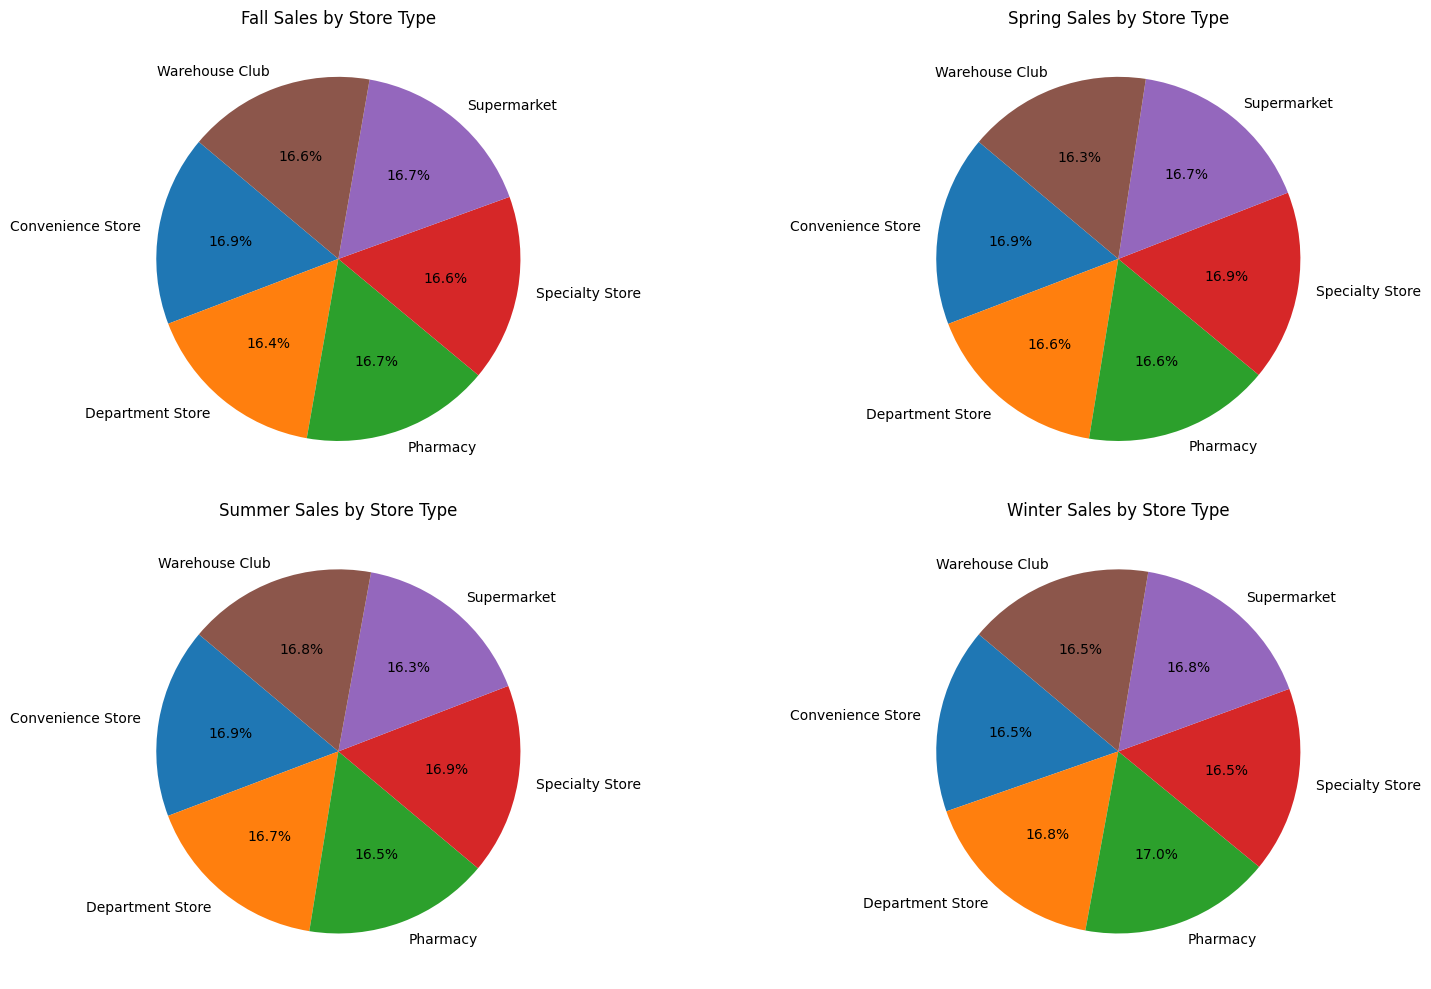

In [79]:
# Groupping data by season and store type
grouped_data_pie = grouped_data_2.groupby(['Season', 'Store_Type']).sum().reset_index()

# Unique seasons for the subplot
seasons = grouped_data_2['Season'].unique()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten() 

# Plotting each season's pie chart in a subplot
for i, season in enumerate(seasons):
    season_data = grouped_data_pie[grouped_data_pie['Season'] == season]
    axes[i].pie(season_data['Amount($)'], labels=season_data['Store_Type'], 
                autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'{season} Sales by Store Type')


for j in range(len(seasons), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('/kaggle/working/00_average_transaction_plot_by_season_store_01.png', 
            dpi=300, bbox_inches='tight')

plt.show()

The pie charts depict the distribution of sales amounts across different store types for each season. 
> - **Fall**: Sales are evenly distributed, with "Pharmacy" and "Supermarket" contributing slightly more compared to others.
> - **Spring**: "Convenience Stores" and "Specialty Stores" dominate sales, reflecting a seasonal preference for these types.
> - **Summer**: "Specialty Stores" lead in sales, while "Supermarket" lags behind, indicating shifting consumer preferences during the summer.
> - **Winter**: "Pharmacy" sales peak, likely driven by seasonal health-related purchases, while other store types maintain a balanced contribution.
ion.

This data highlights the seasonal variations in consumer spending patterns across store types.

In [80]:
#Groupping by 'Store_Type' and 'Season', then calculating the mean of 'Amount($)'

grouped_data = df_01.groupby(['Store_Type', 'Season'])['Amount($)'].mean().reset_index()
grouped_data

,Store_Type,Season,Amount($)
0,Convenience Store,Fall,52.872504
1,Convenience Store,Spring,53.537230
2,Convenience Store,Summer,53.345305
3,Convenience Store,Winter,51.595034
4,Department Store,Fall,51.384757
5,Department Store,Spring,52.573781
6,Department Store,Summer,52.782716
7,Department Store,Winter,52.575652
8,Pharmacy,Fall,52.363508
9,Pharmacy,Spring,52.458672


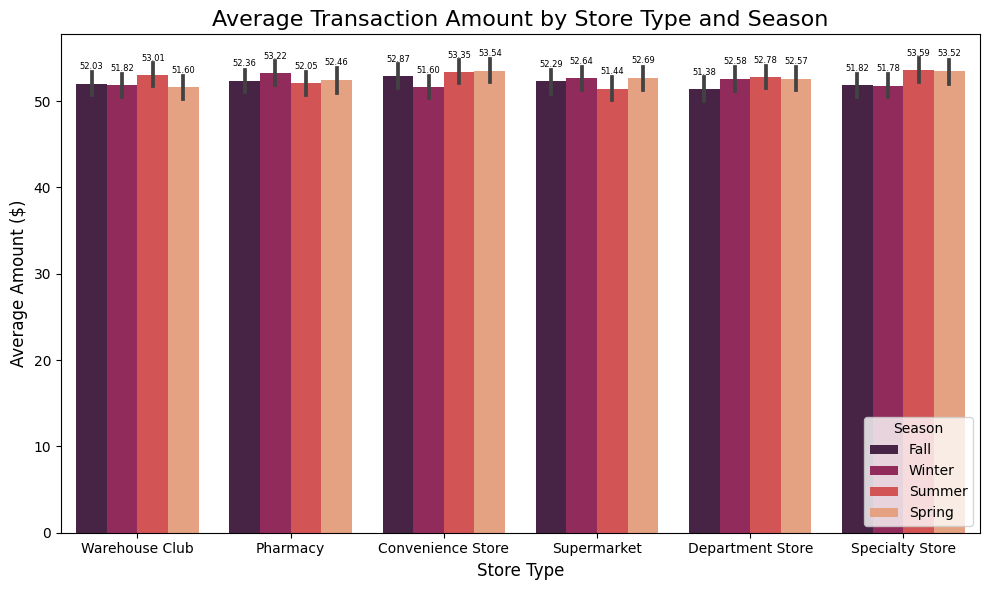

In [81]:
# Creating the grouped bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_01, x='Store_Type', y='Amount($)', hue='Season', palette='rocket')

# Adding values on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=6, padding=9)

#Showing the plot
plt.title('Average Transaction Amount by Store Type and Season', fontsize=16)
plt.xlabel('Store Type', fontsize=12)
plt.ylabel('Average Amount ($)', fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.legend(title='Season', fontsize=10, loc='lower right')
plt.tight_layout()

# Saving the plot
plt.savefig('/kaggle/working/01_average_transaction_plot_01.png', dpi=300, bbox_inches='tight')

plt.show()



The data outlines the average sales amount across various store types and seasons:

> **Convenience Stores** maintain consistently high sales in Spring (53.54 Dollar) and Summer (53.35Dollar), but drop slightly in Winter (51.60Dollar).
> 
> **Department Stores** show stable sales across all seasons, peaking in Summer (52.78Dollar).
>
> **Pharmacies** see their highest sales in Winter (53.22Dollar), likely due to seasonal health demands.
> 
> **Specialty Stores** perform best in Summer (53.59Dollar) and Spring (53.52Dollar), reflecting seasonal consumer preferences.
> 
> **Supermarkets** experience steady sales across seasons, with a slight dip in Summer (51.44Dollar).
> 
> **Warehouse Clubs** show their highest sales in Summer (53.01Dollar) but lower averages in other seasons.
>

Overall, Summer and Spring emerge as the peak seasons for most store types, with Winter favoring Pharmacies.


## **02. Which payment method is most commonly used in high-value transactions (Above the average transiction amount) and how does it varies accross cities?**

In [82]:
df.sort_values(by='Amount($)', ascending=False).head(3)

,Transaction_ID,Total_Items,Amount($),Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
29771,1000531045,10,100.0,Cash,Dallas,Supermarket,False,Young Adult,Summer,BOGO (Buy One Get One)
2645,1000408241,9,100.0,Debit Card,Atlanta,Warehouse Club,True,Middle-Aged,Summer,Discount on Selected Items
12181,1000591212,1,100.0,Credit Card,San Francisco,Convenience Store,True,Young Adult,Fall,NaN


In [83]:
#Finding the mean of the transaction amount
mean_amount = df['Amount($)'].mean()
mean_amount

52.45984311688312

In [84]:
df_02 = df[df['Amount($)'] > mean_amount]

print("Filtered Dataset Shape with High-Vale Transactions Only is ",df_02.shape)

Filtered Dataset Shape with High-Vale Transactions Only is  (19190, 10)


**Unique Payment Methods**

In [85]:
df_02['Payment_Method'].unique()

array(['Credit Card', 'Cash', 'Mobile Payment', 'Debit Card'],
      dtype=object)

In [86]:
payment_method = df_02['Payment_Method'].value_counts()
payment_method

Payment_Method
Debit Card        4900
Cash              4814
Credit Card       4763
Mobile Payment    4713
Name: count, dtype: int64

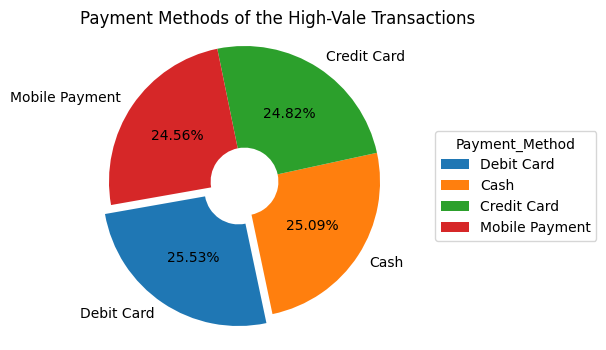

In [87]:
plt.figure(figsize=(6, 4))

plt.pie(payment_method, labels=payment_method.index, autopct="%1.2f%%",
        explode=(0.08,0,0,0), shadow=False, startangle=190,
        wedgeprops=dict(width=0.75))

plt.legend(payment_method.index, title="Payment_Method", loc='center left',
           bbox_to_anchor=(0.9, 0.5))

plt.title("Payment Methods of the High-Vale Transactions", loc='right')
plt.axis('equal')

# Saving the plot
plt.savefig('/kaggle/working/02_payment_methods_of_transaction_plot_02.png', dpi=300, bbox_inches='tight')


plt.show()

This pie chart illustrates the distribution of payment methods for high-value transactions. It divides the total percentage into four categories:

> **Debit Card (blue):** 25.53% of the transactions were completed using debit cards, making it the most utilized method.
>
> **Cash (orange):** 25.09% of the payments were made in cash, slightly less than debit card usage.
>
> **Credit Card (green):** 24.82% of transactions involved credit cards, ranking third.
>
> **Mobile Payment (red):** 24.56% of the transactions used mobile payment methods, which is the least used but very close to others.

The chart shows a fairly balanced distribution among the four payment methods, with no significant dominance by any single category.

**Unique Cities**

In [88]:
df_02['City'].unique()

array(['Miami', 'Seattle', 'New York', 'Dallas', 'Houston', 'Los Angeles',
       'Atlanta', 'Boston', 'Chicago', 'San Francisco'], dtype=object)

In [89]:
city_counts = df['City'].value_counts()
city_counts

City
Houston          3898
Boston           3892
San Francisco    3891
New York         3880
Los Angeles      3869
Chicago          3855
Miami            3834
Seattle          3824
Dallas           3809
Atlanta          3748
Name: count, dtype: int64

In [90]:
columns_to_drop_02 = ['Transaction_ID','Total_Items',
                      'Store_Type','Discount_Applied',
                      'Customer_Category','Season',
                      'Promotion']
df_02 = df_02.drop(columns=columns_to_drop_02)

In [91]:
df_02.head(5)

,Amount($),Payment_Method,City
4,62.27,Credit Card,Miami
6,88.07,Cash,Seattle
7,62.51,Mobile Payment,New York
11,68.68,Mobile Payment,Dallas
12,59.65,Debit Card,Miami


In [92]:
high_value_df = df_02.groupby(['Payment_Method','City']).size().reset_index(name='Count')
high_value_df

,Payment_Method,City,Count
0,Cash,Atlanta,467
1,Cash,Boston,485
2,Cash,Chicago,516
3,Cash,Dallas,454
4,Cash,Houston,492
5,Cash,Los Angeles,485
6,Cash,Miami,467
7,Cash,New York,482
8,Cash,San Francisco,489
9,Cash,Seattle,477


In [93]:
total_payments_by_method = high_value_df.groupby('Payment_Method')['Count'].sum().reset_index()

total_payments_by_method.sort_values(by='Count', ascending=False)

,Payment_Method,Count
2,Debit Card,4900
0,Cash,4814
1,Credit Card,4763
3,Mobile Payment,4713


### **Most Common Payment Method for High-Valued Transaction by Cities**

In [94]:
most_common_payment_method = high_value_df.loc[high_value_df.groupby('City')['Count'].idxmax()]
most_common_payment_method_sorted = most_common_payment_method.sort_values(by='Count',ascending =True)
most_common_payment_method_sorted

,Payment_Method,City,Count
1,Cash,Boston,485
16,Credit Card,Miami,489
4,Cash,Houston,492
18,Credit Card,San Francisco,504
30,Mobile Payment,Atlanta,506
37,Mobile Payment,New York,510
29,Debit Card,Seattle,512
2,Cash,Chicago,516
25,Debit Card,Los Angeles,518
23,Debit Card,Dallas,538


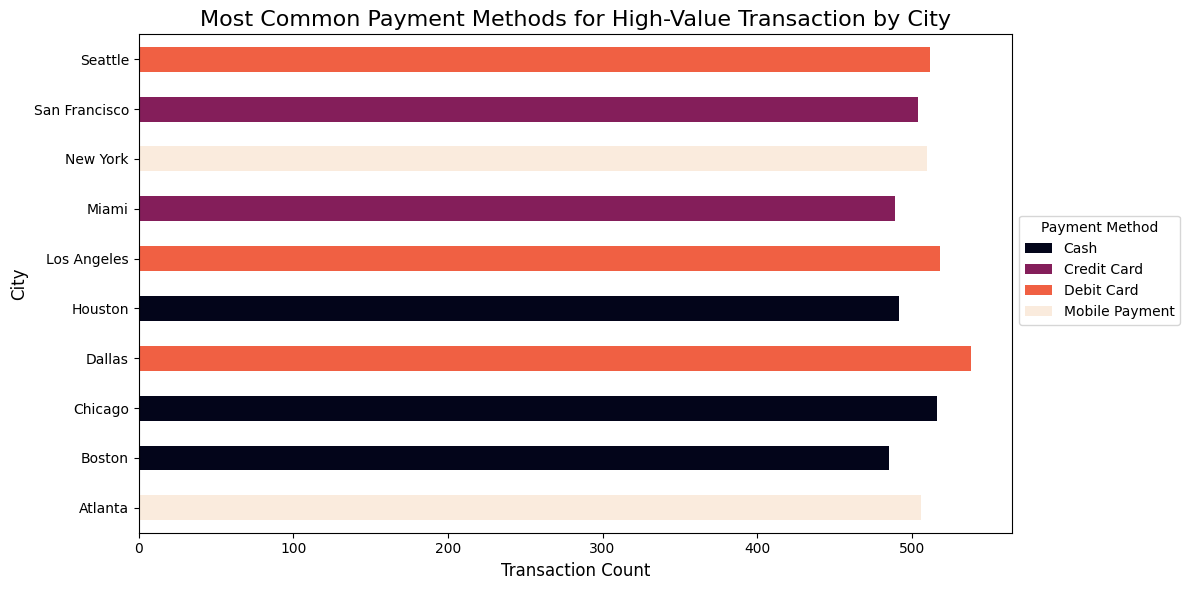

In [95]:
#pivot method for stacked bar plot
pivot_df = most_common_payment_method_sorted.pivot_table(index='City', 
                                                         columns='Payment_Method', 
                                                         values='Count', aggfunc='sum', 
                                                         fill_value=0)

# Plotting
ax = pivot_df.plot(kind='barh', stacked=True, 
                   figsize=(12, 6), colormap='rocket')

# Customizing the plot
plt.title('Most Common Payment Methods for High-Value Transaction by City', fontsize=16)
plt.xlabel('Transaction Count', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.legend(title='Payment Method', fontsize=10, bbox_to_anchor=(1, 0.65))

# Adjusting layout
plt.tight_layout()

# Saving the plot
plt.savefig('/kaggle/working/03_most_common_payment_method_plot_02.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


> This data represents payment methods used across various cities, along with the count of transactions.The counts range from 485 (lowest, Cash in Boston) to 538 (highest, Debit Card in Dallas). Debit Card transactions have the highest count (518 in Los Angeles, 538 in Dallas).Mobile Payments were relatively higher in New York (510) and Atlanta (506).Credit Card usage is notable in Miami (489) and San Francisco (504).Cash is common in Chicago (516) and Houston (492).
>
> This provides insights into payment preferences across cities, with varying transaction counts for each payment method.


### **Most Common Payment Method for High Valed Transaction**  

In [96]:
# Filtering where 'Payment_Method' is 'Debit Card'
debit_card_payments = high_value_df[high_value_df['Payment_Method'] == 'Debit Card']
debit_card_payments

,Payment_Method,City,Count
20,Debit Card,Atlanta,451
21,Debit Card,Boston,484
22,Debit Card,Chicago,484
23,Debit Card,Dallas,538
24,Debit Card,Houston,492
25,Debit Card,Los Angeles,518
26,Debit Card,Miami,485
27,Debit Card,New York,453
28,Debit Card,San Francisco,483
29,Debit Card,Seattle,512


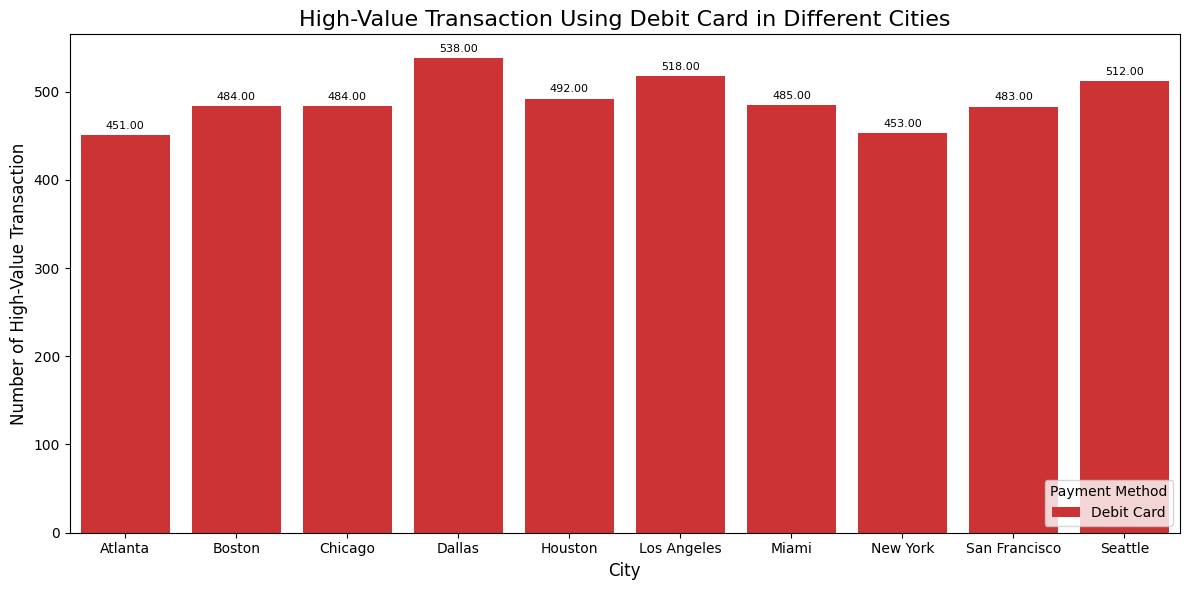

In [97]:
# Creating the grouped bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=debit_card_payments, x='City', y='Count', 
                 hue='Payment_Method', palette='Set1')

# Adding values on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, padding=3)

#Showing the plot
plt.title('High-Value Transaction Using Debit Card in Different Cities', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of High-Value Transaction', fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.legend(title='Payment Method', fontsize=10, loc='lower right')
plt.tight_layout()

# Saving the plot
plt.savefig('/kaggle/working/04_Transactions_Using_Dabit_Card.png', dpi=300, bbox_inches='tight')

plt.show()

This data focuses on **Debit Card transactions** across 10 cities, summarizing the transaction counts as follows:

> **Highest Transactions:**    - **Dallas** recorded the highest number of Debit Card transactions with **538**.
> 
> **Lowest Transactions:**    - **Atlanta** had the lowest number of transactions, with **451**.
>   
> **Other Cities:**  Cities like **Seattle (512)**, **Los Angeles (518)**, and **Houston (492)** also show high transaction counts.   - **Boston (484)**, **Chicago (484)**, **Miami (485)**, and **San Francisco (483)** have nearly identical transaction counts, indicating similar patterns of Debit Card usage. **New York (453)** has slightly lower transaction counts compared to other major Cities.
 other major cities.

The data highlights **Dallas** as the city with the highest usage of Debit Cards and **Atlanta** as the lowest. Overall, transaction counts vary but show a moderate-to-high adoption of Debit Cards across cities.

## **03. How do the sales amounts in transactions with discounts compare to those without discounts, and what trends can be observed over the month?**?

In [98]:
df.head(2)

,Transaction_ID,Total_Items,Amount($),Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000667075,5,30.98,Debit Card,Chicago,Warehouse Club,True,Teenager,Fall,BOGO (Buy One Get One)
1,1000156022,3,23.29,Credit Card,Boston,Warehouse Club,True,Homemaker,Winter,Discount on Selected Items


In [99]:
columns_to_drop_03 = ['Total_Items', 'Amount($)',
                      'Payment_Method','City',
                      'Store_Type','Customer_Category',
                      'Promotion']
df_03 = df.drop(columns=columns_to_drop_03)
df_03.head()

,Transaction_ID,Discount_Applied,Season
0,1000667075,True,Fall
1,1000156022,True,Winter
2,1000681674,False,Fall
3,1000692089,False,Summer
4,1000328702,False,Summer


In [100]:
df_03.shape

(38500, 3)

In [101]:
df_03["Transaction_ID"] = range(1, len(df_03) + 1)
df_03.head()

,Transaction_ID,Discount_Applied,Season
0,1,True,Fall
1,2,True,Winter
2,3,False,Fall
3,4,False,Summer
4,5,False,Summer


In [102]:
discount_counts = df_03['Discount_Applied'].value_counts()
discount_counts

Discount_Applied
True     19433
False    19067
Name: count, dtype: int64

In [103]:
df_03['Season'].unique()

array(['Fall', 'Winter', 'Summer', 'Spring'], dtype=object)

In [104]:
discount_by_season = df_03.groupby(['Season', 'Discount_Applied']).size().unstack(fill_value=0)
discount_by_season

Discount_Applied,False,True
Season,,
Fall,4811,4938
Spring,4806,4796
Summer,4718,4849
Winter,4732,4850


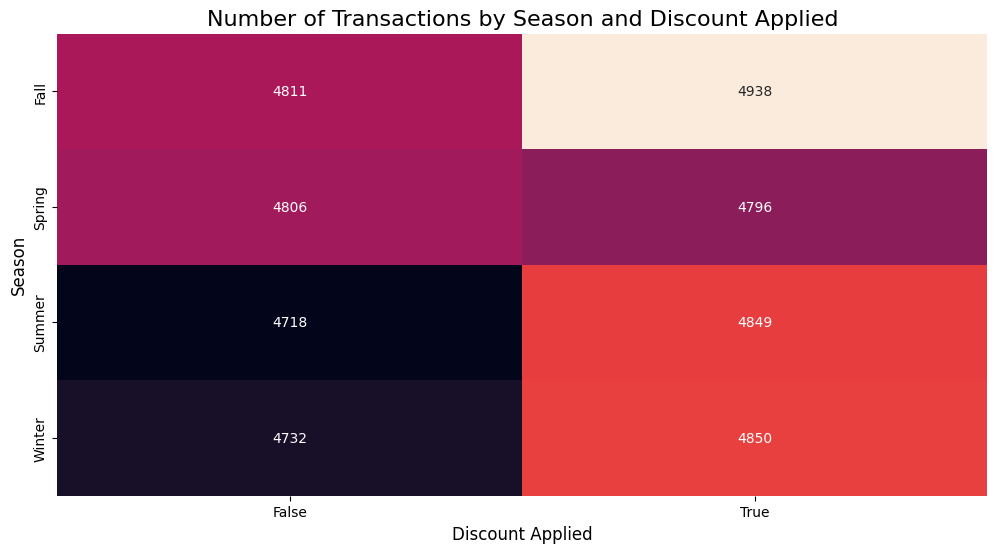

In [105]:
# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(discount_by_season, annot=True, cmap='rocket', fmt='g', cbar=False)

# Customizing the plot
plt.title('Number of Transactions by Season and Discount Applied', fontsize=16)
plt.xlabel('Discount Applied', fontsize=12)
plt.ylabel('Season', fontsize=12)


plt.savefig('/kaggle/working/05_no_of_transaction_season_discount_03.png', dpi=300, bbox_inches='tight')

plt.show()


> Across all seasons, there are more transactions with discounts than without. Here’s a quick summary:
>
> Fall has the largest difference, with slightly more transactions getting discounts. The summer follows, with discounts applied in more transactions than not. Moreover winter also shows more discounted transactions, but the gap is smaller than Fall and Summer. Whereas Spring is the closest, with nearly the same number of discounted and non-discounted transactions.
> 
> In short, discounts are most popular in Fall and Summer, and less emphasized in Spring.


## **04. What are the top three cities with the highest average number of items per transaction, and how do their sales amounts vary across seasons?**?

In [106]:
df.head(2)

,Transaction_ID,Total_Items,Amount($),Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000667075,5,30.98,Debit Card,Chicago,Warehouse Club,True,Teenager,Fall,BOGO (Buy One Get One)
1,1000156022,3,23.29,Credit Card,Boston,Warehouse Club,True,Homemaker,Winter,Discount on Selected Items


In [107]:
columns_to_drop_04 = ['Amount($)',
                      'Payment_Method',
                      'Store_Type','Discount_Applied','Customer_Category',
                      'Promotion']
df_04 = df.drop(columns=columns_to_drop_04)
df_04.head()

,Transaction_ID,Total_Items,City,Season
0,1000667075,5,Chicago,Fall
1,1000156022,3,Boston,Winter
2,1000681674,7,Chicago,Fall
3,1000692089,5,Atlanta,Summer
4,1000328702,4,Miami,Summer


In [108]:
df_04["Transaction_ID"] = range(1, len(df_04) + 1)
df_04.head()

,Transaction_ID,Total_Items,City,Season
0,1,5,Chicago,Fall
1,2,3,Boston,Winter
2,3,7,Chicago,Fall
3,4,5,Atlanta,Summer
4,5,4,Miami,Summer


In [109]:
# Average items per transaction by city
avg_items_per_city = df_04.groupby("City")["Total_Items"].mean().sort_values(ascending=False)

# top 3 cities
top_cities = avg_items_per_city.head(3)
top_cities

City
Chicago    5.547601
Houston    5.530272
Miami      5.521909
Name: Total_Items, dtype: float64

These are the top three cities having average items per transaction.

In [110]:
sales_by_season = df_04.groupby(["City", "Season"])["Total_Items"].sum().unstack(fill_value=0)
sales_by_season

Season,Fall,Spring,Summer,Winter
City,,,,
Atlanta,5296,5095,4921,5158
Boston,5707,5108,5262,5264
Chicago,5287,5482,5323,5294
Dallas,5062,5278,5130,5441
Houston,5348,5294,5385,5530
Los Angeles,5345,5209,5163,5510
Miami,5587,5186,5288,5110
New York,5277,5353,5385,5208
San Francisco,5335,5413,5262,5223


In [111]:
selected_cities = ["Chicago", "Houston", "Miami"]
filtered_table = sales_by_season.loc[selected_cities]
filtered_table

Season,Fall,Spring,Summer,Winter
City,,,,
Chicago,5287,5482,5323,5294
Houston,5348,5294,5385,5530
Miami,5587,5186,5288,5110


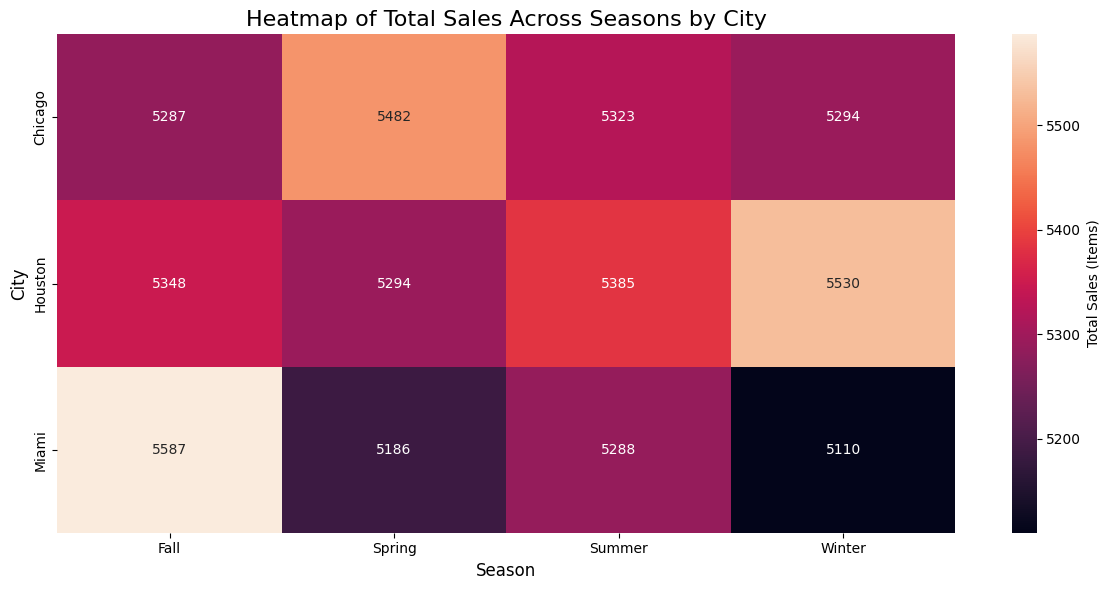

In [112]:
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_table, annot=True, fmt=".0f", 
            cmap="rocket", cbar_kws={'label': 'Total Sales (Items)'})


plt.title("Heatmap of Total Sales Across Seasons by City", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


plt.savefig('/kaggle/working/06_Total_Sales_Across_Seasons_by_City.png', dpi=300, bbox_inches='tight')
plt.show()

This data represents seasonal transaction counts across top three cities:

> **Chicago:**   - Transactions are relatively stable across seasons, ranging from **5287 (Fall)** to **5482 (Spring)**, with **Spring** having the highest activity.
>
> **Houston:**   - Transaction counts peak in **Winter (5530)** and are lowest in **Spring (5294)**, showing a notable seasonal variation.
>
> **Miami:**   - **Fall (5587)** has the highest transactions, while **Winter (5110)** shows the lowest, indicating a decrease in activity during colder months.
 months.

Overall, **Miami** shows the highest fall transactions, **Houston** peaks in winter, and **Chicago** maintains a consistent distribution across seasons.

## **05. How effective are different promotions in driving higher transaction amounts, and which promotion type performs best in each season?**  ?

In [113]:
df.head(2)

,Transaction_ID,Total_Items,Amount($),Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000667075,5,30.98,Debit Card,Chicago,Warehouse Club,True,Teenager,Fall,BOGO (Buy One Get One)
1,1000156022,3,23.29,Credit Card,Boston,Warehouse Club,True,Homemaker,Winter,Discount on Selected Items


In [114]:
columns_to_drop_05 = ['Total_Items','Payment_Method','City',
                      'Store_Type','Discount_Applied','Customer_Category']

df_05 = df.drop(columns=columns_to_drop_05)
df_05.head()

,Transaction_ID,Amount($),Season,Promotion
0,1000667075,30.98,Fall,BOGO (Buy One Get One)
1,1000156022,23.29,Winter,Discount on Selected Items
2,1000681674,25.62,Fall,Discount on Selected Items
3,1000692089,14.64,Summer,Discount on Selected Items
4,1000328702,62.27,Summer,NaN


In [115]:
df_05['Promotion'] = df_05['Promotion'].fillna('No Promotion')

In [116]:
df_05["Promotion"].unique()

array(['BOGO (Buy One Get One)', 'Discount on Selected Items',
       'No Promotion'], dtype=object)

In [117]:
mean_amonunt=df_05["Amount($)"].mean()
mean_amount

52.45984311688312

In [118]:
high_value_transaction = df_05[df_05["Amount($)"]>mean_amount]

print(high_value_transaction.shape)
print("These is the filtered dataframe for high value transaction")

(19190, 4)
These is the filtered dataframe for high value transaction


In [119]:
high_value_transaction.sort_values(by="Amount($)",ascending = False)

,Transaction_ID,Amount($),Season,Promotion
2645,1000408241,100.00,Summer,Discount on Selected Items
29771,1000531045,100.00,Summer,BOGO (Buy One Get One)
12181,1000591212,100.00,Fall,No Promotion
16789,1000341701,99.99,Fall,No Promotion
35217,1000966260,99.99,Fall,BOGO (Buy One Get One)
...,...,...,...,...
15011,1000658998,52.47,Fall,Discount on Selected Items
28990,1000140374,52.47,Summer,Discount on Selected Items
21520,1000099845,52.47,Winter,Discount on Selected Items
487,1000518133,52.47,Summer,Discount on Selected Items


In [120]:
# Group by 'Promotion' and counting the number of transactions
transactions_per_promotion = high_value_transaction.groupby('Promotion')['Transaction_ID'].count()

print(transactions_per_promotion)

Promotion
BOGO (Buy One Get One)        6372
Discount on Selected Items    6388
No Promotion                  6430
Name: Transaction_ID, dtype: int64


> The data shows that most transactions happen without any promotion (6,430), followed by those with a "Discount on Selected Items" (6,388) and "BOGO" (6,372). This suggests that while promotions can encourage people to buy, many purchases still happen without any special offers, meaning other factors like need or product appeal also play a big role.

In [121]:
total_amount = high_value_transaction.groupby(['Season', 'Promotion'])['Amount($)'].sum().unstack()
total_amount

Promotion,BOGO (Buy One Get One),Discount on Selected Items,No Promotion
Season,,,
Fall,121315.28,122068.94,123084.42
Spring,121080.44,125415.04,122392.07
Summer,124757.79,120471.53,122663.40
Winter,121204.90,117847.91,122369.21


In [122]:
best_promotions = total_amount.idxmax(axis=1)
best_promotions

Season
Fall                    No Promotion
Spring    Discount on Selected Items
Summer        BOGO (Buy One Get One)
Winter                  No Promotion
dtype: object

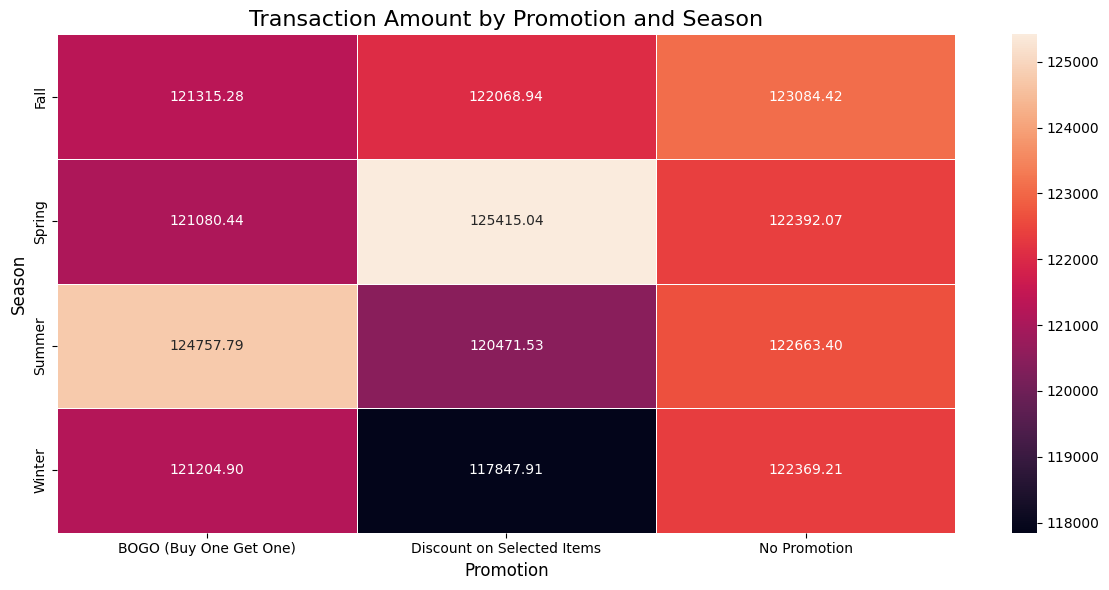

In [123]:
plt.figure(figsize=(12, 6))
sns.heatmap(total_amount, annot=True, cmap="rocket", fmt='.2f', linewidths=0.5)

# Customizing the plot
plt.title('Transaction Amount by Promotion and Season', fontsize=16)
plt.xlabel('Promotion', fontsize=12)
plt.ylabel('Season', fontsize=12)

# Show the plot
plt.tight_layout()

plt.savefig('/kaggle/working/07_Transaction_Amount_by_Promo_Season.png', dpi=300, bbox_inches='tight')
plt.show()

This data shows sales revenue across four seasons for three types of promotions:
**No Promotion:**  
   - Revenue remains consistent across all seasons, ranging from **122,369.21 (Winter)** to **123,084.42 (Fall)**.  
   - **Fall** generated the highest revenue without promotions.  
2. **BOGO (Buy One Get One):**  
   - **Summer (124,757.79)** saw the highest revenue, while **Spring (121,080.44)** had the lowest.  
   - BOGO performs better in warmer seasons like **Summer* 

3. **Discount on Selected Items:**  
   - **Spring (125,415.04)** generated the highest revenue, while **Winter (117,847.91)** was the lowest.  
   - Discounts on selected ite best during Spring. perform best during **Spring**.

Overall, **Spring** and **Summer** tend to drive higher revenues with promotions, while **Fall** performs well even without promotions.